Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



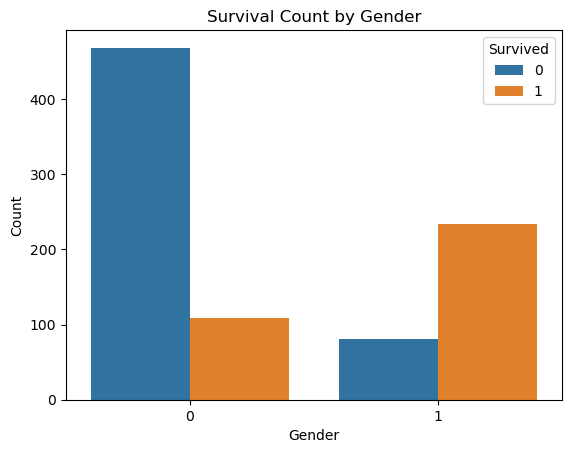

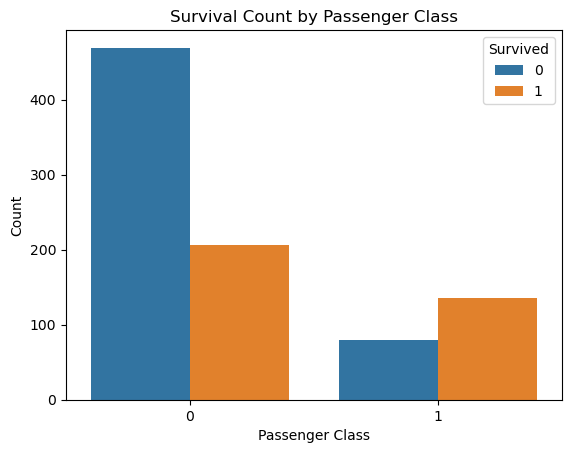

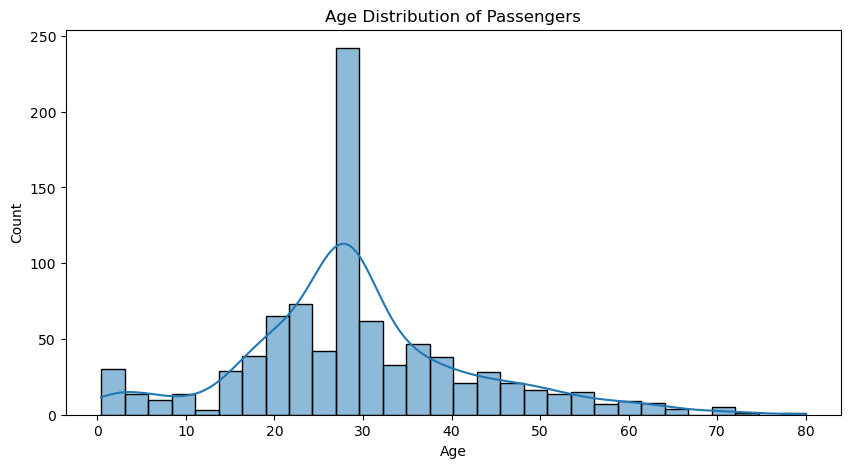

The person is predicted to survive.


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Define the URL for the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Load the Titanic dataset from the URL
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

# Data preprocessing
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])

# Select features
features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Data visualization
# Visualize the survival rate by gender
sns.countplot(data=df, x='Sex_female', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize the survival rate by passenger class
sns.countplot(data=df, x='Pclass_1', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Visualize the age distribution of passengers
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Predict whether a person will survive or not
# You can replace the values in the 'predict_df' DataFrame with the information of the person you want to predict
predict_df = pd.DataFrame({
    'Age': [30],           # Age of the person
    'SibSp': [1],          # Number of Siblings/Spouses Aboard
    'Parch': [0],          # Number of Parents/Children Aboard
    'Fare': [50],          # Fare
    'Sex_female': [1],     # 1 if Female, 0 if Male
    'Sex_male': [0],
    'Pclass_1': [1],       # 1 if 1st Class, 0 otherwise
    'Pclass_2': [0],       # 1 if 2nd Class, 0 otherwise
    'Pclass_3': [0],       # 1 if 3rd Class, 0 otherwise
    'Embarked_C': [0],     # 1 if Embarked at C, 0 otherwise
    'Embarked_Q': [0],     # 1 if Embarked at Q, 0 otherwise
    'Embarked_S': [1]      # 1 if Embarked at S, 0 otherwise
})

# Make the prediction
survival_prediction = clf.predict(predict_df)

if survival_prediction[0] == 1:
    print("The person is predicted to survive.")
else:
    print("The person is predicted to not survive.")
